# Receive Renovar API Data

## Constants and imports

### Imports

In [1]:
from SensorData import SensorData
from GetSensorDataService import GetSensorDataService
from SensorDataAnalysisService import SensorDataAnalysisService as sensor_analysis

/Users/Fernando/Documents/Projects/Github/lcqar-low-cost-monit-proc/venv/lib/python3.9/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


### Sensors IDs

In [2]:
TEMPERATURE_ID     =  130
PRESSURE_ID        =  131
ALPHA_CO_ID        =  132
ALPHA_NO2_ID       =  133
ALPHA_SO2_1_ID     =  134
ALPHA_OX_1_ID      =  135
ALPHA_OX_2_ID      =  136
ALPHA_SO2_2_ID     =  137
EXT_TEMPERATURE_ID =  138
EXT_HUMIDITY_ID    =  139
PM10_ID            =  140
PM25_ID            =  141
PM01_ID            =  142
OPC_TEMPERATURE_ID =  143
OPC_HUMIDITY_ID    =  144

### API Constants

In [3]:
HOST = "renovar.lcqar.ufsc.br"
PORT = 8080
GET_SAMPLES_BY_SENSOR = "/sample/sensor/all/"
HTTP_REQUEST_MAIN = 'http://' + HOST + ':' + str(PORT) + GET_SAMPLES_BY_SENSOR

# Alphasense SO2 Sensor Data

In [4]:
get_sensor_data_service = GetSensorDataService(HOST, PORT, GET_SAMPLES_BY_SENSOR)

In [5]:
sensor_data_1 = get_sensor_data_service.get_data_from_file("data/raw-data-monit-fix-2022-2023-Diamante/ISB_SO21.CSV",
                                                         sensor_name='alpha_so2_1_conc')
sensor_data_1.head()

/Users/Fernando/Documents/Projects/Github/lcqar-low-cost-monit-proc/data-pre-processing/GetSensorDataService.py:15: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['DateTime'] = (pd.to_datetime(df[date_time_col], infer_datetime_format=False, format='%d/%m/%Y/%H/%M/%S'))


,latitude,longitude,measuring,DateTime
0,-28.456899,-48.972999,40.19,2022-11-20 13:47:27
1,-28.456899,-48.972999,36.70,2022-11-21 10:39:52
2,-28.456899,-48.972999,37.40,2022-11-21 10:55:39
3,-28.456899,-48.972999,34.61,2022-11-21 11:11:27
4,-28.456899,-48.972999,23.45,2022-11-21 11:27:13


In [6]:
sensor_data_2 = get_sensor_data_service.get_data_from_file("data/raw-data-monit-fix-2022-2023-Diamante/ISB_SO22.CSV",
                                                         sensor_name='alpha_so2_2_conc')
sensor_data_2.head()

/Users/Fernando/Documents/Projects/Github/lcqar-low-cost-monit-proc/data-pre-processing/GetSensorDataService.py:15: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['DateTime'] = (pd.to_datetime(df[date_time_col], infer_datetime_format=False, format='%d/%m/%Y/%H/%M/%S'))


,latitude,longitude,measuring,DateTime
0,-28.456899,-48.972999,65.03,2022-11-21 10:43:03
1,-28.456899,-48.972999,63.83,2022-11-21 10:58:48
2,-28.456899,-48.972999,62.47,2022-11-21 11:14:38
3,-28.456899,-48.972999,62.13,2022-11-21 11:30:22
4,-28.456899,-48.972999,60.57,2022-11-21 11:46:05


In [7]:
alpha_so21_conc_data = SensorData(ALPHA_SO2_1_ID, sensor_name='alpha_so2_1_conc', lower_limit=5.0, upper_limit=2e3, 
                                t_90=60, t_90_value=2e3, sampling_period=15 * 60, 
                                get_service=get_sensor_data_service)

alpha_so22_conc_data = SensorData(ALPHA_SO2_1_ID, sensor_name='alpha_so2_2_conc', lower_limit=5.0, upper_limit=2e3, 
                                t_90=60, t_90_value=2e3, sampling_period=15 * 60, 
                                get_service=get_sensor_data_service)

## Upload Data from File

In [8]:
alpha_so21_conc_data.read_from_csv()
alpha_so21_conc_data.web_dataframe.head()

/Users/Fernando/Documents/Projects/Github/lcqar-low-cost-monit-proc/data-pre-processing/SensorData.py:130: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  self.web_dataframe['DateTime'] = (pd.to_datetime(df['DateTime'], infer_datetime_format=True))


,latitude,longitude,measuring,DateTime
0,-28.456899,-48.972999,40.19,2022-11-20 13:47:27
1,-28.456899,-48.972999,36.70,2022-11-21 10:39:52
2,-28.456899,-48.972999,37.40,2022-11-21 10:55:39
3,-28.456899,-48.972999,34.61,2022-11-21 11:11:27
4,-28.456899,-48.972999,23.45,2022-11-21 11:27:13


In [9]:
alpha_so22_conc_data.read_from_csv()
alpha_so22_conc_data.web_dataframe.head()

/Users/Fernando/Documents/Projects/Github/lcqar-low-cost-monit-proc/data-pre-processing/SensorData.py:130: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  self.web_dataframe['DateTime'] = (pd.to_datetime(df['DateTime'], infer_datetime_format=True))


,latitude,longitude,measuring,DateTime
0,-28.456899,-48.972999,65.03,2022-11-21 10:43:03
1,-28.456899,-48.972999,63.83,2022-11-21 10:58:48
2,-28.456899,-48.972999,62.47,2022-11-21 11:14:38
3,-28.456899,-48.972999,62.13,2022-11-21 11:30:22
4,-28.456899,-48.972999,60.57,2022-11-21 11:46:05


## Tag data

In [10]:
alpha_so21_conc_data.tag_and_prepare_data()
alpha_so21_conc_data.sensor_dataframe.head()

,latitude,longitude,measuring,Tag,Diff
DateTime,,,,,
2022-11-20 13:45:00,-28.456899,-48.972999,40.19,VALID,NaN
2022-11-20 14:00:00,NaN,NaN,NaN,MISSING,NaN
2022-11-20 14:15:00,NaN,NaN,NaN,MISSING,NaN
2022-11-20 14:30:00,NaN,NaN,NaN,MISSING,NaN
2022-11-20 14:45:00,NaN,NaN,NaN,MISSING,NaN


In [11]:
alpha_so22_conc_data.tag_and_prepare_data()
alpha_so22_conc_data.sensor_dataframe.head()

,latitude,longitude,measuring,Tag,Diff
DateTime,,,,,
2022-11-21 10:30:00,-28.456899,-48.972999,65.03,VALID,NaN
2022-11-21 10:45:00,-28.456899,-48.972999,63.83,VALID,-1.20
2022-11-21 11:00:00,-28.456899,-48.972999,62.47,VALID,-1.36
2022-11-21 11:15:00,NaN,NaN,NaN,MISSING,NaN
2022-11-21 11:30:00,-28.456899,-48.972999,62.13,VALID,NaN


### Data Tag contabilization

In [12]:
tags = ['MISSING','LTLL', 'GTUL', 'BADSPIKE', 'VALID']
data_contabilization = sensor_analysis.count_tags(tags, alpha_so21_conc_data.sensor_dataframe)
data_contabilization

,#,%
MISSING,3410,23.316239
LTLL,2246,15.357265
GTUL,6050,41.367521
BADSPIKE,0,0.0
VALID,2919,19.958974
TOTAL,14625,100.0


In [13]:
tags = ['MISSING','LTLL', 'GTUL', 'BADSPIKE', 'VALID']
data_contabilization = sensor_analysis.count_tags(tags, alpha_so22_conc_data.sensor_dataframe)
data_contabilization

,#,%
MISSING,2889,19.866593
LTLL,0,0.0
GTUL,0,0.0
BADSPIKE,0,0.0
VALID,11653,80.133407
TOTAL,14542,100.0


### Plot raw data

<Axes: xlabel='DateTime'>

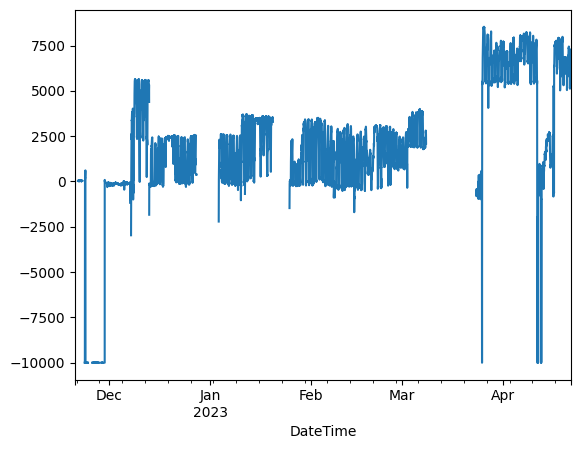

In [14]:
alpha_so21_conc_data.sensor_dataframe['measuring'].plot()

<Axes: xlabel='DateTime'>

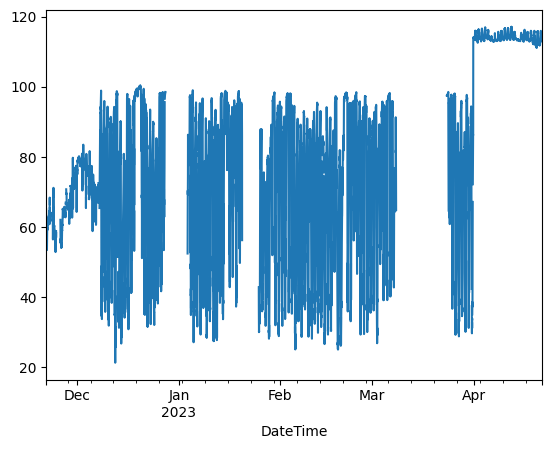

In [15]:
alpha_so22_conc_data.sensor_dataframe['measuring'].plot()

### Plot Valid Data

<Axes: xlabel='DateTime'>

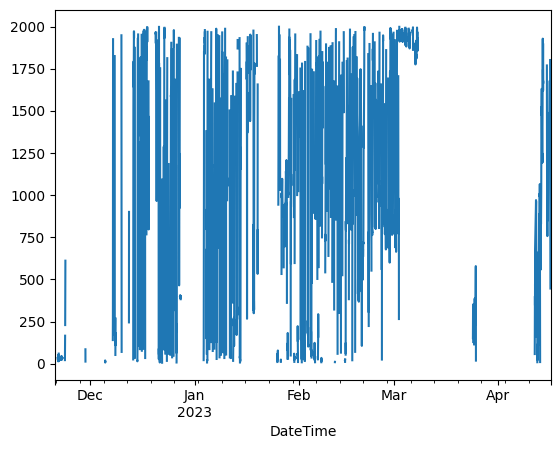

In [16]:
alpha_so21_conc_data.sensor_dataframe[alpha_so21_conc_data.sensor_dataframe['Tag'] == 'VALID']['measuring'].resample('15T').mean().plot()

<Axes: xlabel='DateTime'>

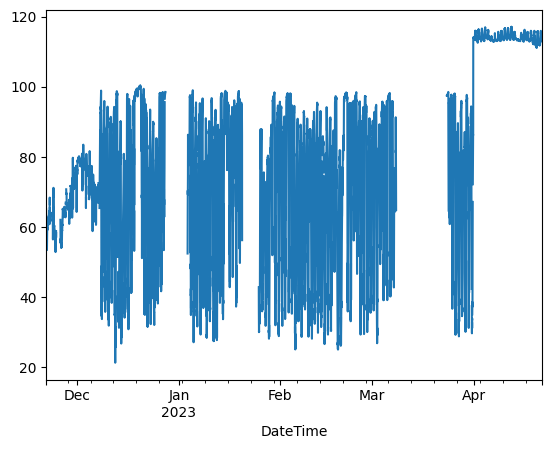

In [17]:
alpha_so22_conc_data.sensor_dataframe[alpha_so22_conc_data.sensor_dataframe['Tag'] == 'VALID']['measuring'].resample('15T').mean().plot()

### Plot raw derivatives

<Axes: xlabel='DateTime'>

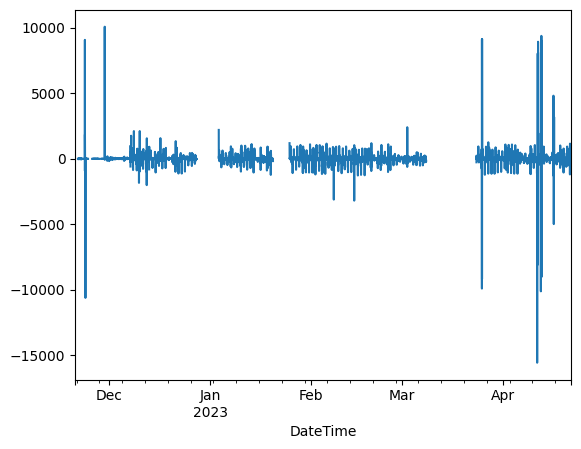

In [18]:
alpha_so21_conc_data.sensor_dataframe['Diff'].resample('15T').mean().plot()

<Axes: xlabel='DateTime'>

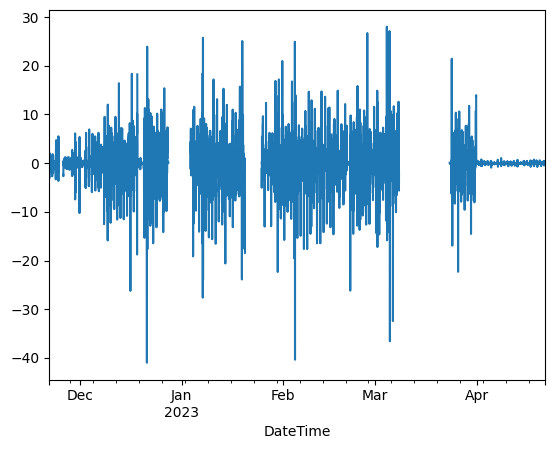

In [19]:
alpha_so22_conc_data.sensor_dataframe['Diff'].resample('15T').mean().plot()

### Plot valid derivatives

<Axes: xlabel='DateTime'>

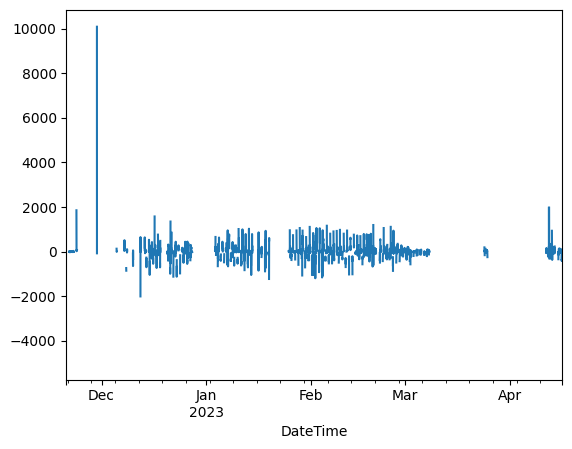

In [20]:
alpha_so21_conc_data.valid_differential_series.resample('15T').mean().plot()

<Axes: xlabel='DateTime'>

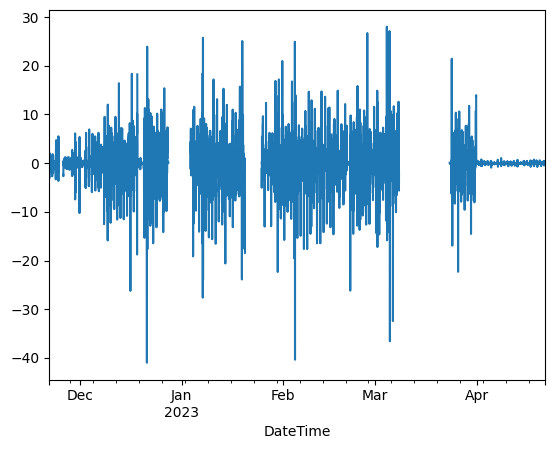

In [21]:
alpha_so22_conc_data.valid_differential_series.resample('15T').mean().plot()

## Resampled data

In [22]:
alpha_so21_conc_data.sensor_dataframe_1hr.head()

,latitude,longitude,measuring,Diff,Hour,Count,Std,% valid,Tag
DateTime,,,,,,,,,
2022-11-20 13:00:00,-28.456899,-48.972999,40.19,NaN,13,1,NaN,25.0,LOWSAMPLES
2022-11-20 14:00:00,NaN,NaN,NaN,NaN,14,0,NaN,0.0,LOWSAMPLES
2022-11-20 15:00:00,NaN,NaN,NaN,NaN,15,0,NaN,0.0,LOWSAMPLES
2022-11-20 16:00:00,NaN,NaN,NaN,NaN,16,0,NaN,0.0,LOWSAMPLES
2022-11-20 17:00:00,NaN,NaN,NaN,NaN,17,0,NaN,0.0,LOWSAMPLES


In [23]:
alpha_so22_conc_data.sensor_dataframe_1hr.head()

,latitude,longitude,measuring,Diff,Hour,Count,Std,% valid,Tag
DateTime,,,,,,,,,
2022-11-21 10:00:00,-28.456899,-48.972999,64.430000,-1.2000,10,2,0.848528,50.0,LOWSAMPLES
2022-11-21 11:00:00,-28.456899,-48.972999,61.723333,-1.4600,11,3,1.013180,75.0,VALID
2022-11-21 12:00:00,-28.456899,-48.972999,58.695000,-0.8175,12,4,1.042385,100.0,VALID
2022-11-21 13:00:00,-28.456899,-48.972999,55.877500,-0.1900,13,4,0.662237,100.0,VALID
2022-11-21 14:00:00,-28.456899,-48.972999,55.952500,0.2700,14,4,1.392058,100.0,VALID


### Data contabilization

In [24]:
tags = ['LOWSAMPLES','VALID'] 
data_contabilization = sensor_analysis.count_tags(tags, alpha_so21_conc_data.sensor_dataframe_1hr)
data_contabilization

,#,%
LOWSAMPLES,2840,80.476056
VALID,689,19.523944
TOTAL,3529,100.0


In [25]:
tags = ['LOWSAMPLES','VALID'] 
data_contabilization = sensor_analysis.count_tags(tags, alpha_so22_conc_data.sensor_dataframe_1hr)
data_contabilization

,#,%
LOWSAMPLES,718,19.746975
VALID,2918,80.253025
TOTAL,3636,100.0


### Plot raw hourly data

<Axes: xlabel='DateTime'>

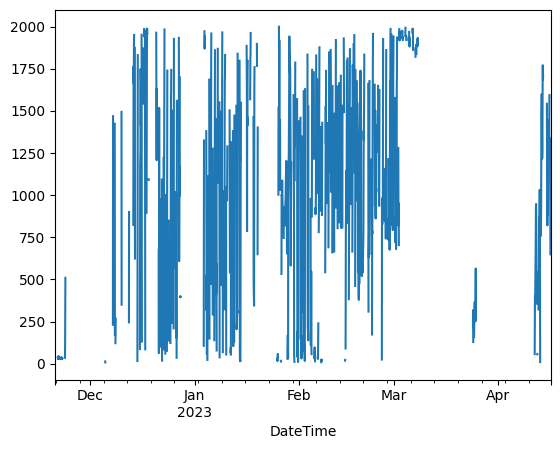

In [26]:
alpha_so21_conc_data.sensor_dataframe_1hr['measuring'].plot()

<Axes: xlabel='DateTime'>

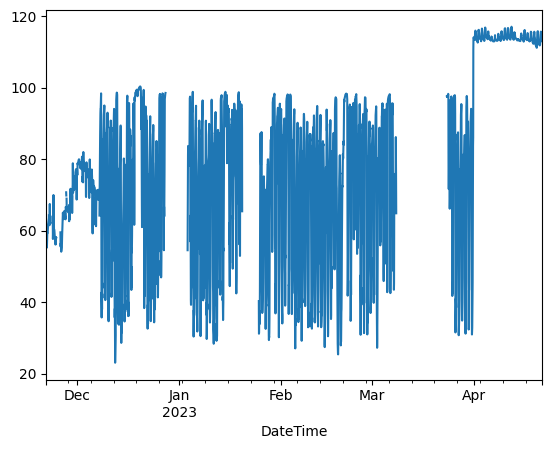

In [27]:
alpha_so22_conc_data.sensor_dataframe_1hr['measuring'].plot()

### Plot valid hourly data

<Axes: xlabel='DateTime'>

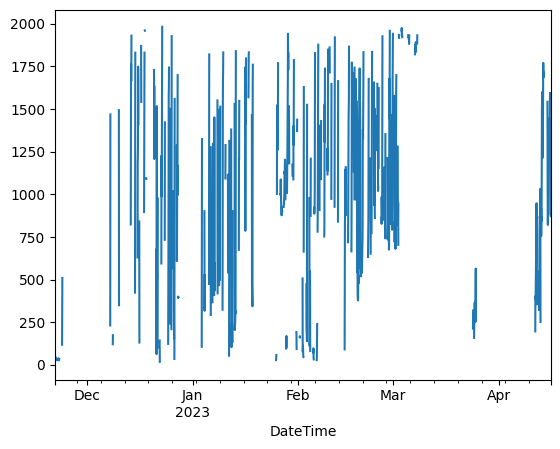

In [28]:
alpha_so21_conc_data.sensor_dataframe_1hr[alpha_so21_conc_data.sensor_dataframe_1hr['Tag'] == 'VALID']['measuring'].resample('H').mean().plot()

<Axes: xlabel='DateTime'>

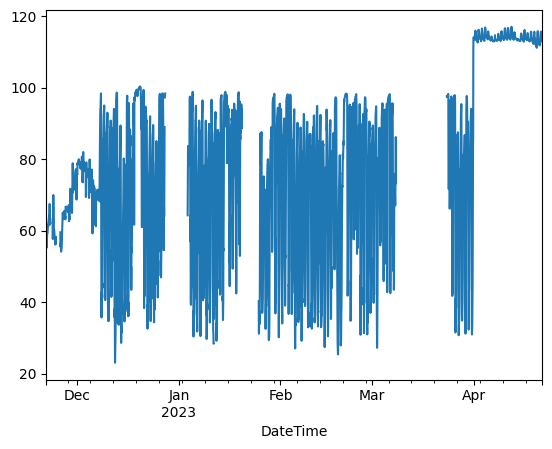

In [29]:
alpha_so22_conc_data.sensor_dataframe_1hr[alpha_so22_conc_data.sensor_dataframe_1hr['Tag'] == 'VALID']['measuring'].resample('H').mean().plot()

### Plot raw standard deviation

<Axes: xlabel='DateTime'>

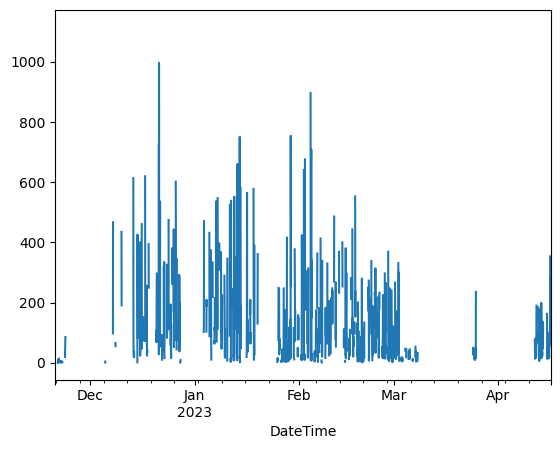

In [30]:
alpha_so21_conc_data.sensor_dataframe_1hr['Std'].resample('H').mean().plot()

<Axes: xlabel='DateTime'>

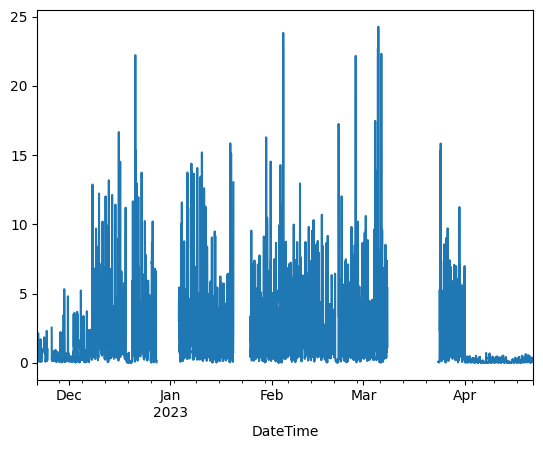

In [31]:
alpha_so22_conc_data.sensor_dataframe_1hr['Std'].resample('H').mean().plot()

### Plot valid standard deviation

<Axes: xlabel='DateTime'>

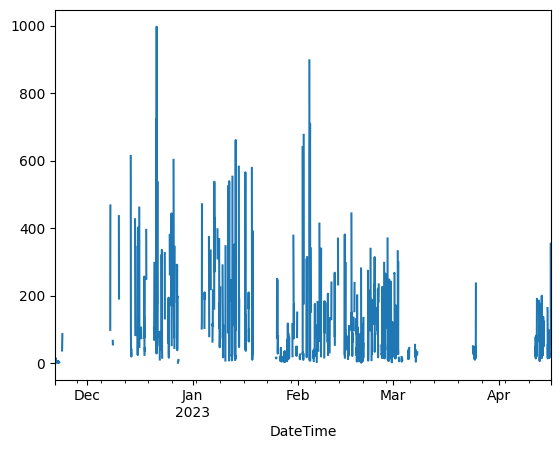

In [32]:
alpha_so21_conc_data.sensor_dataframe_1hr[alpha_so21_conc_data.sensor_dataframe_1hr['Tag'] == 'VALID']['Std'].resample('H').mean().plot()

<Axes: xlabel='DateTime'>

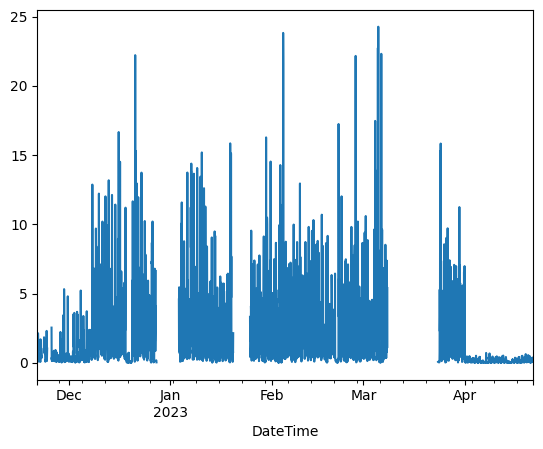

In [33]:
alpha_so22_conc_data.sensor_dataframe_1hr[alpha_so22_conc_data.sensor_dataframe_1hr['Tag'] == 'VALID']['Std'].resample('H').mean().plot()

## Calculate quantiles and tag data accordingly

### Calculate quantiles

In [34]:
alpha_so21_conc_data.calculate_and_tag_quantiles()
alpha_so21_conc_data.sensor_dataframe_1hr.head()

,latitude,longitude,measuring,Diff,Hour,Count,Std,% valid,Tag,GLOBAL_QTLE01,GLOBAL_QTLE99
DateTime,,,,,,,,,,,
2022-11-20 13:00:00,-28.456899,-48.972999,40.19,NaN,13,1,NaN,25.0,LOWSAMPLES,17.040000,1930.0750
2022-11-20 14:00:00,NaN,NaN,NaN,NaN,14,0,NaN,0.0,LOWSAMPLES,26.243333,1941.5825
2022-11-20 15:00:00,NaN,NaN,NaN,NaN,15,0,NaN,0.0,LOWSAMPLES,30.775000,1938.4425
2022-11-20 16:00:00,NaN,NaN,NaN,NaN,16,0,NaN,0.0,LOWSAMPLES,12.556667,1935.3000
2022-11-20 17:00:00,NaN,NaN,NaN,NaN,17,0,NaN,0.0,LOWSAMPLES,33.915000,1930.7700


In [35]:
alpha_so22_conc_data.calculate_and_tag_quantiles()
alpha_so22_conc_data.sensor_dataframe_1hr.head()

,latitude,longitude,measuring,Diff,Hour,Count,Std,% valid,Tag,GLOBAL_QTLE01,GLOBAL_QTLE99
DateTime,,,,,,,,,,,
2022-11-21 10:00:00,-28.456899,-48.972999,64.430000,-1.2000,10,2,0.848528,50.0,LOWSAMPLES,30.65000,116.3975
2022-11-21 11:00:00,-28.456899,-48.972999,61.723333,-1.4600,11,3,1.013180,75.0,VALID,28.33000,116.8375
2022-11-21 12:00:00,-28.456899,-48.972999,58.695000,-0.8175,12,4,1.042385,100.0,VALID,26.26875,116.8375
2022-11-21 13:00:00,-28.456899,-48.972999,55.877500,-0.1900,13,4,0.662237,100.0,VALID,25.77500,116.6450
2022-11-21 14:00:00,-28.456899,-48.972999,55.952500,0.2700,14,4,1.392058,100.0,VALID,27.25000,116.6325


## Process valid hourly data

In [36]:
valid_dataframe_1 = (alpha_so21_conc_data.sensor_dataframe_1hr[alpha_so21_conc_data.sensor_dataframe_1hr['Tag'] == 'VALID']
                   .drop(columns=['Tag']).resample('H').mean())
valid_dataframe_2 = (alpha_so22_conc_data.sensor_dataframe_1hr[alpha_so22_conc_data.sensor_dataframe_1hr['Tag'] == 'VALID']
                   .drop(columns=['Tag']).resample('H').mean())

### Plot mean vs. standard deviation for valid hourly data colored by valid percentage of valid samples

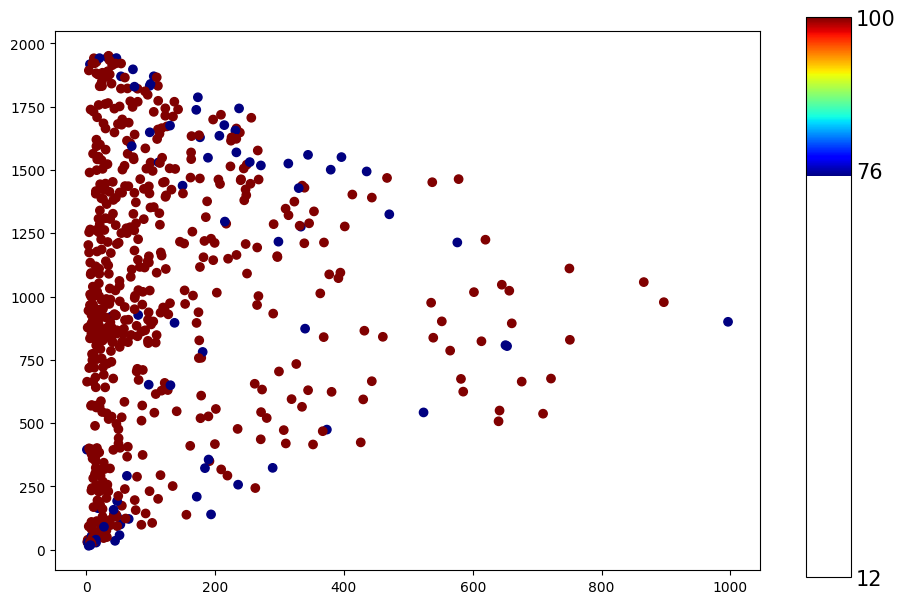

In [37]:
sensor_analysis.plot_mean_vs_std(valid_dataframe_1)

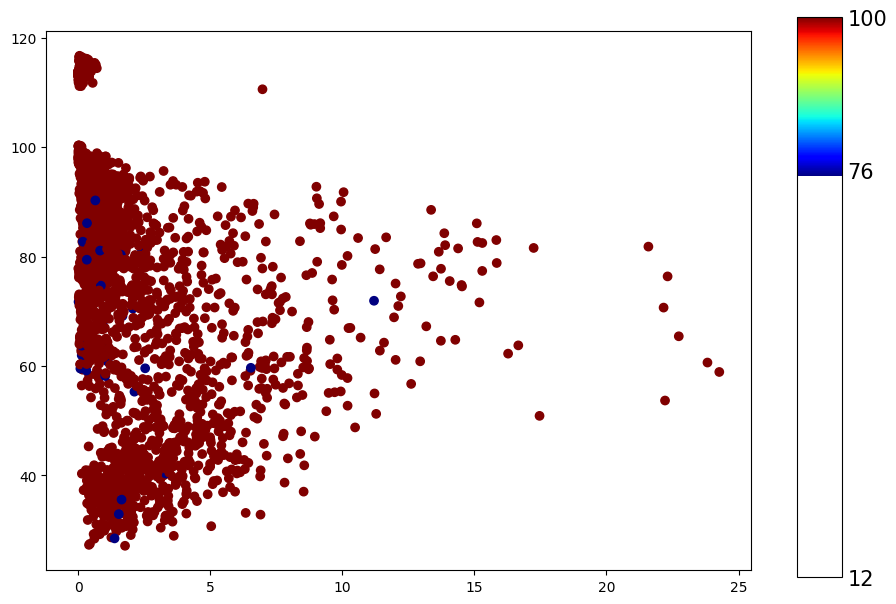

In [38]:
sensor_analysis.plot_mean_vs_std(valid_dataframe_2)

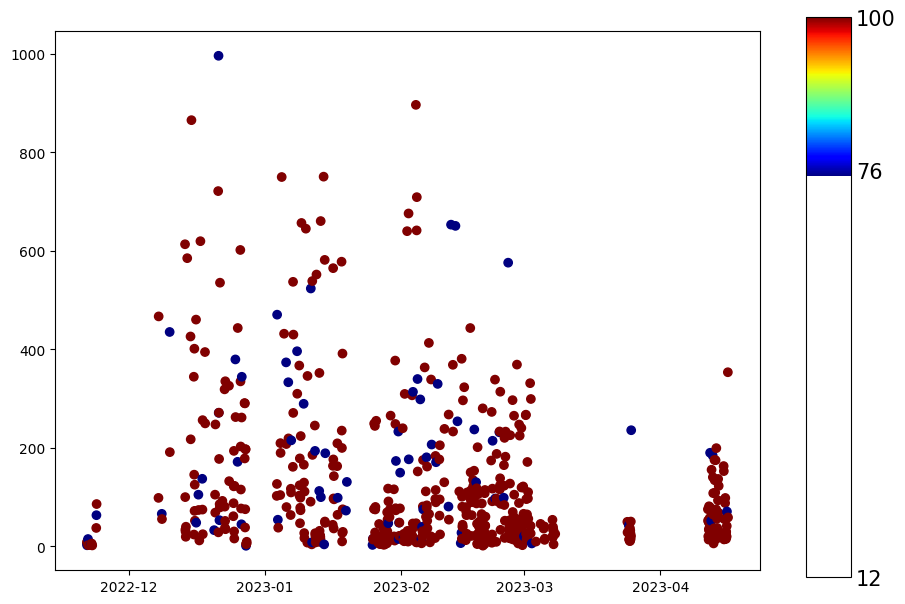

In [39]:
sensor_analysis.plot_std_in_time(valid_dataframe_1)

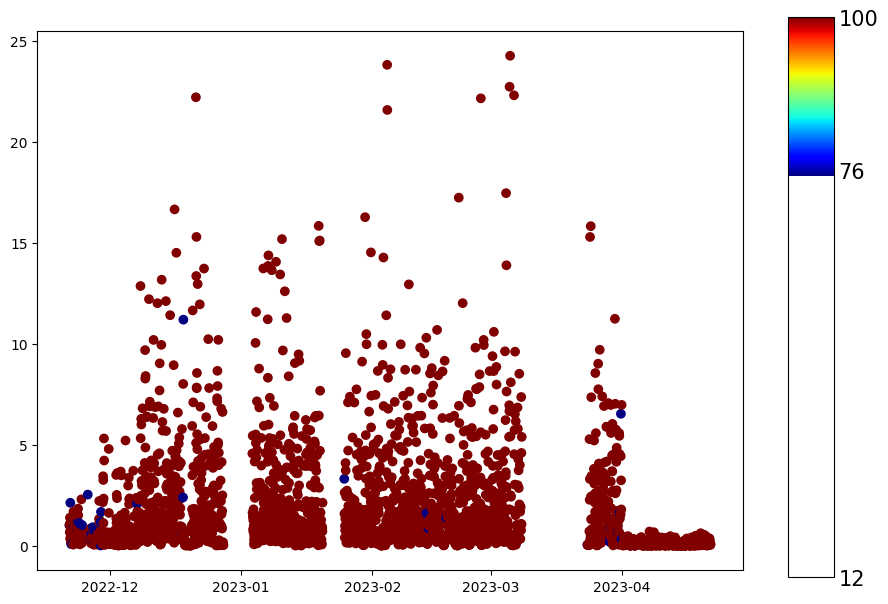

In [40]:
sensor_analysis.plot_std_in_time(valid_dataframe_2)

/Users/Fernando/Documents/Projects/Github/lcqar-low-cost-monit-proc/data-pre-processing/SensorDataAnalysisService.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Hour'] = df['Hour'].astype('int64')


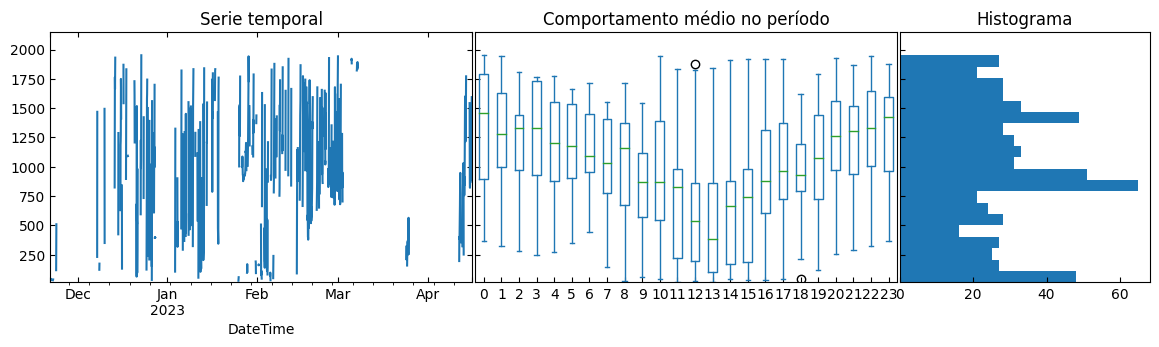

In [41]:
sensor_analysis.plot_box_hist(valid_dataframe_1, 20)

/Users/Fernando/Documents/Projects/Github/lcqar-low-cost-monit-proc/data-pre-processing/SensorDataAnalysisService.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Hour'] = df['Hour'].astype('int64')


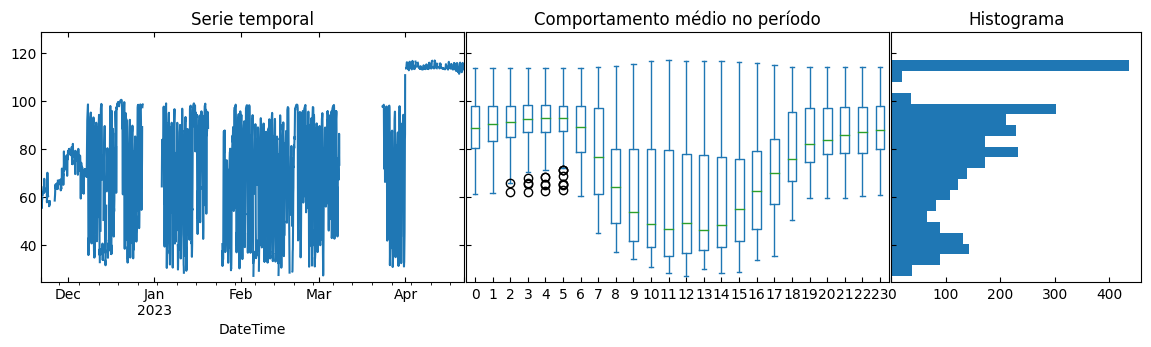

In [42]:
sensor_analysis.plot_box_hist(valid_dataframe_2, 20)

## Save Data

In [43]:
alpha_so21_conc_data.save_to_csv()
alpha_so22_conc_data.save_to_csv()